<a href="https://colab.research.google.com/github/gulizaaitkulova/AI_ISE4132_12204505/blob/main/AI_W6_HW_12204505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Application System course
Week 6 HW - 12204505 Guliza Aitkulova

Topic: Convolutional Neural Networks using TensorFlow

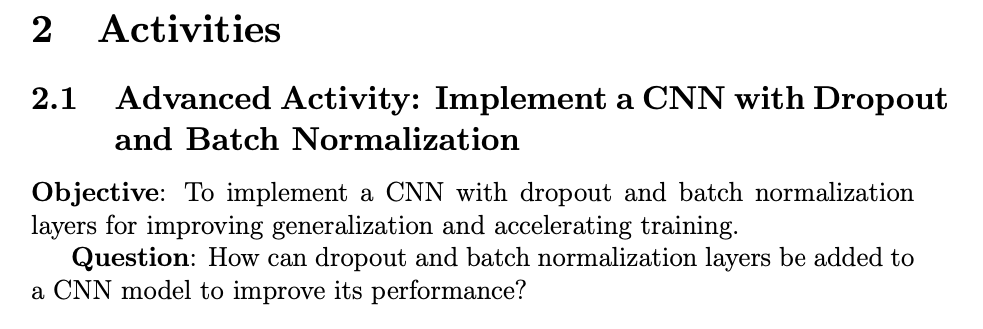

So I am going to add batch normalization and dropout layers lines into the CNN model code that I practiced during the Week 6 lab session. In order to do this, I will use tf.keras.layers.BatchNormalization() and tf.keras.layers.Dropout() functions.

In [6]:
# Import TensorFlow library
# Source: TensorFlow official documentation
import tensorflow as tf

In [7]:
# Load the MNIST dataset
# Source: TensorFlow official documentation
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# Normalize the images
# Source: TensorFlow official documentation
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Build the CNN model
# Source: TensorFlow official documentation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(), # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the model
# Source: TensorFlow official documentation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# Source: TensorFlow official documentation
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1246 - accuracy: 0.9623
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0613 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0337 - accuracy: 0.9897


In [11]:
# Evaluate the model
# Source: TensorFlow official documentation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9898


In [12]:
# Save the model
model.save('mnist_cnn_model.h5') # Saving the model to a HDF5 file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Load the saved model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5') # Loading the model from the HDF5 file

In [14]:
# Evaluate the loaded model
test_loss , test_acc = loaded_model.evaluate(test_images, test_labels) # Evaluating the loaded model on the test data
print("Test accuracy:", test_acc) # Printing the test accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9898
Test accuracy: 0.989799976348877


Here, the batch normalization layers are added after each convolutional layer and the dense layer. As we learned from the week 6 lecture material, the batch normalization helps stabilize the training process and can improve the performance and generalization of the model.
The dropout layers are added after each max pooling layer and the dense layer as well. Dropout helps prevent overfitting by randomly disabling neurons during training, forcing the model to learn more robust features.

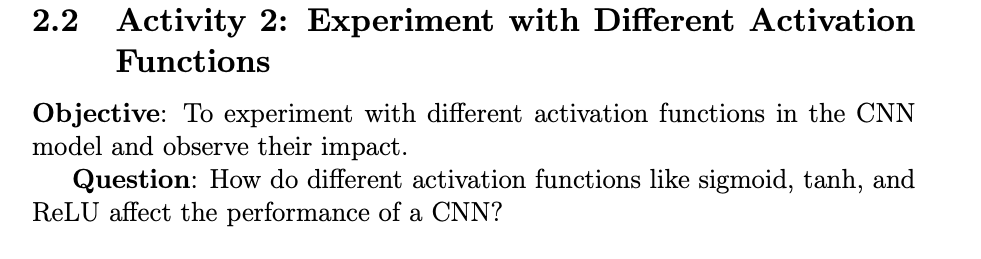

Using Sigmoid as an activation function:

In [15]:
# Build the CNN model
# Source: TensorFlow official documentation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='sigmoid', input_shape=(28, 28, 1)), # Sigmoid activation
    tf.keras.layers.BatchNormalization(), # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'), # Sigmoid activation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'), # Sigmoid activation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# Compile the model
# Source: TensorFlow official documentation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# Source: TensorFlow official documentation
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1436 - accuracy: 0.9557
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0761 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0638 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0536 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0494 - accuracy: 0.9851


In [17]:
# Evaluate the model
# Source: TensorFlow official documentation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9843


In [18]:
# Save the model
model.save('mnist_cnn_model.h5') # Saving the model to a HDF5 file

In [19]:
# Load the saved model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5') # Loading the model from the HDF5 file

In [20]:
# Evaluate the loaded model
test_loss , test_acc = loaded_model.evaluate(test_images, test_labels) # Evaluating the loaded model on the test data
print("Test accuracy:", test_acc) # Printing the test accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9843
Test accuracy: 0.9843000173568726


Tanh



In [21]:
# Build the CNN model
# Source: TensorFlow official documentation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='tanh', input_shape=(28, 28, 1)), # Tanh activation
    tf.keras.layers.BatchNormalization(), # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='tanh'), # Tanh activation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'), # Tanh activation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
# Compile the model
# Source: TensorFlow official documentation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# Source: TensorFlow official documentation
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1818 - accuracy: 0.9471
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1023 - accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0851 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0779 - accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0714 - accuracy: 0.9780


In [23]:
# Evaluate the model
# Source: TensorFlow official documentation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1785 - accuracy: 0.9483


In [24]:
# Save the model
model.save('mnist_cnn_model.h5') # Saving the model to a HDF5 file

In [25]:
# Load the saved model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5') # Loading the model from the HDF5 file

In [26]:
# Evaluate the loaded model
test_loss , test_acc = loaded_model.evaluate(test_images, test_labels) # Evaluating the loaded model on the test data
print("Test accuracy:", test_acc) # Printing the test accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.1785 - accuracy: 0.9483
Test accuracy: 0.9483000040054321


By experimenting with different activation functions, I could observe how they affect the model's learning and performance. Each activation function has its own characteristics and can yield different results. In this case, the ReLU had the highest accuracy than the Sigmoid and Tanh, Tanh having the lowest one.
The choice of activation function may depend on the specific problem and dataset, so it's always good to experiment and find the best activation function for a particular task.

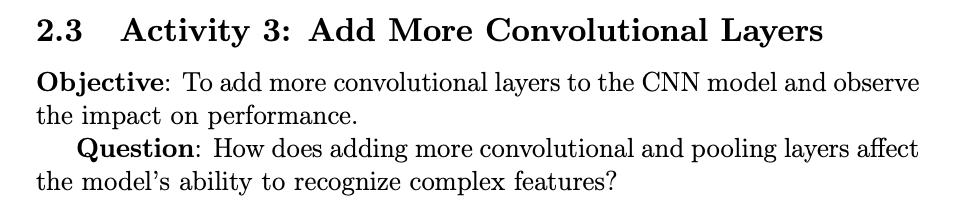

In [27]:
# Build the CNN model
# Source: TensorFlow official documentation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(), # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # Adding more convolutional layer
    tf.keras.layers.BatchNormalization(), # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), # Adding more convolutional layer
    tf.keras.layers.BatchNormalization(), # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
# Compile the model
# Source: TensorFlow official documentation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# Source: TensorFlow official documentation
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 6ms/step - loss: 0.1589 - accuracy: 0.9516
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0729 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0596 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0438 - accuracy: 0.9872


In [29]:
# Evaluate the model
# Source: TensorFlow official documentation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0394 - accuracy: 0.9881


In [30]:
# Save the model
model.save('mnist_cnn_model.h5') # Saving the model to a HDF5 file

In [31]:
# Load the saved model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5') # Loading the model from the HDF5 file

In [32]:
# Evaluate the loaded model
test_loss , test_acc = loaded_model.evaluate(test_images, test_labels) # Evaluating the loaded model on the test data
print("Test accuracy:", test_acc) # Printing the test accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9881
Test accuracy: 0.988099992275238


Here, two additional convolutional layers are added before the flatten layer.  The number of filters in each convolutional layer is increased progressively (32, 64, 128, 256) to capture more complex features.

In this particular case, since we are working with MNIST dataset, which is not that big, adding more convolutional layers doesn't impact the performance that much. It is because even a small CNN model can achieve good performance with the MNIST dataset.

But when considering bigger datasets in real world cases, adding more convolutional and pooling layers can potentially improve the model's performance by allowing it to learn more complex and hierarchical representations of the input data. The initial layers learn simple features like edges and textures, while the deeper layers learn more abstract and high-level features. However, it's important to note that increasing the number of layers also increases the risk of overfitting, especially if the dataset is small. Proper regularization techniques like dropout and early stopping should be employed to mitigate this risk.

It's always recommended to experiment and fine-tune the architecture based on the specific problem and dataset to find the optimal balance between model complexity and performance.

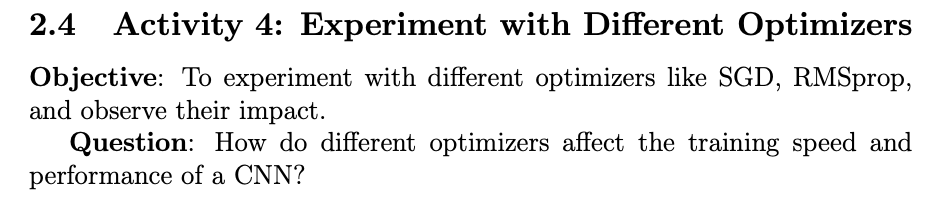

Using SGD optimizer

In [33]:
# Compile the model
# Source: TensorFlow official documentation
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# Source: TensorFlow official documentation
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0327 - accuracy: 0.9903
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0269 - accuracy: 0.9919
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0252 - accuracy: 0.9920


In [34]:
# Evaluate the model
# Source: TensorFlow official documentation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0268 - accuracy: 0.9924


Using RMSprop

In [35]:
# Compile the model
# Source: TensorFlow official documentation
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# Source: TensorFlow official documentation
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0339 - accuracy: 0.9903
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0299 - accuracy: 0.9914
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0281 - accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0254 - accuracy: 0.9925


In [36]:
# Evaluate the model
# Source: TensorFlow official documentation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0226 - accuracy: 0.9947


In this case, I used the SGD and RMSprop optimizers instead of Adam optimizer. Again, since we are working with the MNIST dataset, there is no huge impact on the performance because even a small model can achieve good performance. But when working with big datasets, there is a difference between these optimizers:

1. Stochastic Gradient Descent (SGD):

SGD updates model parameters by taking the gradient of the loss function with respect to the parameters and adjusting them in the direction that reduces the loss. SGD has a fixed learning rate, which means it uses the same step size for all parameters and throughout training.It can have difficulty converging to the global minimum and might oscillate around it, especially when the learning rate is not appropriately tuned.

2. RMSprop (Root Mean Square Propagation):

RMSprop is an optimization algorithm designed to mitigate some of the issues with SGD. It adapts the learning rate for each parameter by taking into account the recent history of gradients. RMSprop maintains a moving average of the squared gradient magnitudes and uses this to normalize the learning rates. It helps in dealing with vanishing or exploding gradients. It often converges faster than plain SGD and is less sensitive to the choice of learning rates.

3.Adam (Adaptive Moment Estimation):

Adam combines the ideas of momentum and RMSprop to provide adaptive learning rates and faster convergence. It maintains two moving averages: the first moment (mean) of the gradients (similar to momentum) and the second moment (uncentered variance) of the gradients (similar to RMSprop).Adam adapts the learning rate for each parameter by considering both the first and second moments, which results in adaptive learning rates that change throughout training.It often converges quickly, handles noisy gradients well, and is widely used for training deep learning models.

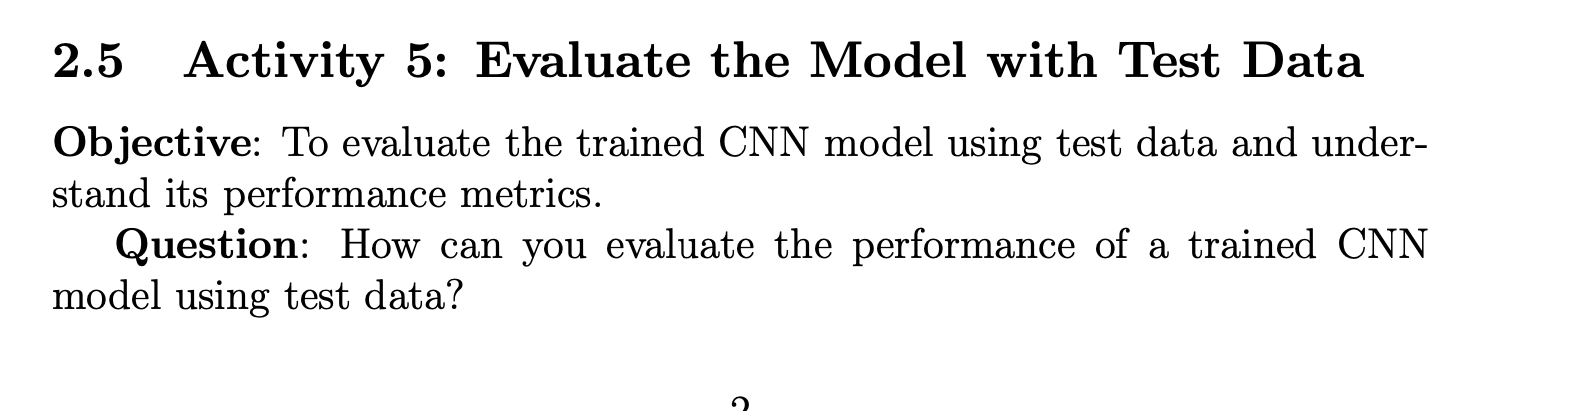

Before this step, we have been evaluating the CNN model's performance by its accuracy. But accuracy is not the only way to evaluate the model performance. There are other properties of the performance, such as precision, recall, and F1 score.

Precision: Precision is most appropriate when you want to minimize false positives. It's valuable in scenarios where the cost of making a false positive prediction is high. For example, in medical diagnosis, you want high precision to avoid diagnosing a healthy person as sick.

Recall: Recall is suitable when you want to minimize false negatives. It's important in situations where missing a positive case can have severe consequences. For instance, in spam email detection, high recall ensures that important emails are not classified as spam.

F1 Score: The F1 score is a balance between precision and recall and is useful when you want to strike a balance between false positives and false negatives. It is often used when both false positives and false negatives have significant implications. For instance, in a search engine, you want to provide accurate results (high precision) while ensuring no relevant results are omitted (high recall).

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(test_images)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_classes, average='macro')
recall = recall_score(test_labels, y_pred_classes, average='macro')
f1 = f1_score(test_labels, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 [==============================] - 1s 3ms/step
Precision: 0.9946493516847928
Recall: 0.9946218285161814
F1 Score: 0.9946231193372268
